# Questionario: Modelos de redes: Barabási-Albert e Configuração
### Douglas Decicino de Andrade NUSP:10883512

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import math
import matplotlib.pyplot as plot
from networkx.algorithms import community

# Média do coeficiente aglomeração e segundo momento do grau para uma rede Barabási-Albert com grau médio igual a 8 e N=1000

In [2]:
#Criando a rede
N = 1000
av_degree = 8
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

#### Abaixo vamos definir uma função que calcula a distribuição de probabilidade do grau

In [7]:
def distribuicao_grau(G):
    vk = dict(G.degree())
    vk = list(vk.values())  #Pegamos apenas os valores dos graus.
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) #Possíveis valores de k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) #A soma dos elementos de P(k) tem que ser 1
    return kvalues,Pk

#### Agora, vamos plotar a distribuição do grau obtida

<ipython-input-4-61b31c27c134>:3: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.loglog(ks,Pk,'bo',basex=10,basey=10)
<ipython-input-4-61b31c27c134>:3: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.loglog(ks,Pk,'bo',basex=10,basey=10)


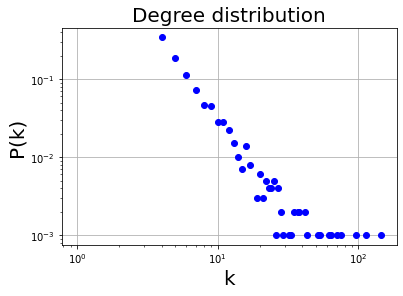

In [4]:
ks, Pk = distribuicao_grau(GBA)
plt.figure()
plt.loglog(ks,Pk,'bo',basex=10,basey=10)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

#### Definição de uma função que calcula o m-ésimo momento da distribuição do grau

In [5]:
def momento_distribuicao_grau(G,m):
    k,Pk = distribuicao_grau(G)
    M = sum((k**m)*Pk)
    return M

In [6]:
print('O segundo momento de P(k) é :', momento_distribuicao_grau(GBA,2))

O segundo momento de P(k) é : 149.89000000000001


In [7]:
print("O coeficiente de aglomeração médio é: ", nx.average_clustering(GBA) )

O coeficiente de aglomeração médio é:  0.03935966633699332


# Valor da entropia de Shannon da distribuição do grau para as redes de Barabási-Albert e de Erdos-Renyi(aleatória).

Vamos primeiro criar uma rede aleatória.

In [8]:
N = 1000
av_degree = 10
p = av_degree/(N-1)
m = int(av_degree/2)
GER = nx.gnp_random_graph(N, p, seed=None, directed=False)

Agora vamos criar uma rede de Barabási-Albert

In [9]:
N = 1000
av_degree = 10
p = av_degree/(N-1)
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

Vamos definir uma função para calcular a entropia de Shannon.

In [12]:
def entropia_shannon(G):
    k,Pk = distribuicao_grau(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

#### Segue abaixo o calculo da entropia de Shannon para as duas redes.

### Grafo aleatório.

In [13]:
H = entropia_shannon(GER)
print("Entropia de shannon a rede de grafo aleatório é: ", "%3.4f"%H)

Entropia de shannon a rede de grafo aleatório é:  3.6653


### Barabási-Albert

In [14]:
H = entropia_shannon(GBA)
print("Entropia de shannon a rede de Barabási-Albert é:", "%3.4f"%H)

Entropia de shannon a rede de Barabási-Albert é: 3.6043


# Coeficiente de correlação de Pearson (rho) entre o grau e a medida eigenvector centrality para um modelo Barabási-Albert com N=1000 e grau médio igual a 10.

Primeiramente vamos novamente criar o modelo.

In [15]:
#Criando a rede
N = 1000
av_degree = 10
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

Segue abaixo o código para calcular o grau da rede

In [29]:
d = dict(GBA.degree())
d = list(d.values())

Segue abaixo o código para calcular a Eigenvector Centrality

In [30]:
EC = dict(nx.eigenvector_centrality(GBA, max_iter = 1000))
EC = list(EC.values())

Segue abaixo o gráfico de dispersão e a medida de correlação entre as medidas pedidas

In [31]:
df = pd.DataFrame({'EC':EC,'Degree':d})
df

,EC,Degree
0,0.118384,60
1,0.044831,12
2,0.105617,56
3,0.146456,47
4,0.102243,48
...,...,...
995,0.004428,5
996,0.010283,5
997,0.011384,5
998,0.022821,5


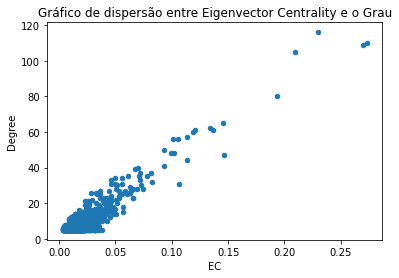

In [33]:
df.plot.scatter(x='EC', y='Degree', title= "Gráfico de dispersão entre Eigenvector Centrality e o Grau");
plot.show(block=True);

In [47]:
print('A correlação entre o grau e o coeficiente de aglomeração é: ',df.corr(method="pearson")['Degree'][0])

A correlação entre o grau e o coeficiente de aglomeração é:  0.9347156830513881


## O que isso indica?

Isso indica que temos uma alta correlação entre o número de graus e a medida de centralidade eigenvector centrality. Como esse modelo é um modelo que cria redes com 'hubs', essa característica é esperada, pois teremos que os vértices com maior conexão serão mais centrais

# Coeficiente de correlação de Pearson (rho) entre o grau e a medida betweeness centrality para um modelo Barabási-Albert com N=500 e grau médio igual a 10.

Primeiramente vamos novamente criar o modelo.

In [48]:
#Criando a rede
N = 500
av_degree = 10
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

Segue abaixo o código para calcular o grau da rede

In [49]:
d = dict(GBA.degree())
d = list(d.values())

Segue abaixo o código para calcular a Betweenness centrality

In [51]:
# Betweenness centrality
B = dict(nx.betweenness_centrality(GBA))
B = list(B.values())

Segue abaixo o gráfico de dispersão e a medida de correlação entre as medidas pedidas

In [56]:
df = pd.DataFrame({'B':B,'Degree':d})
df

,B,Degree
0,0.083794,72
1,0.000847,6
2,0.058205,59
3,0.010968,24
4,0.031935,42
...,...,...
495,0.000327,5
496,0.000381,5
497,0.000406,5
498,0.000213,5


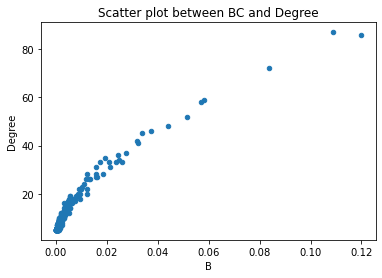

In [57]:
df.plot.scatter(x='B', y='Degree', title= "Scatter plot between BC and Degree");
plot.show(block=True);

In [58]:
print('A correlação entre o grau e o Betweenes Centrality é: ',df.corr(method="pearson")['Degree'][0])

A correlação entre o grau e o Betweenes Centrality é:  0.94720032926887


# Segundo momento do grau para o modelo de configuração com o coeficiente da lei de potência (Zipf) igual a 3.

[ 1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2  1  1  1  2  1  1  2  1  2  1  1  1  2  1  2  2  1  1  1
  1  3  1  1  1  1  2  3  1  1  1  1  1  4  1  1  5  1  1  1  1  3  1  8
  1  1  1  1  1  1  1  1  1  1  1  3  1  1  2  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  6  2  1  1  1  1  3  1  1  1  2  1  1  1  1  1
  1  1  2  1  3  1  1  1  1  1  2  1  2  1  1  1  1  1  2  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  4  1  1  1  1  2
  2  1  1  1  1 10  1  1  2  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  1  1  1  1  1  1  5  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  8  1  2  1  1  2  1  1  1  1  1  1  1  2
  1  2  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  2  1  3  1  2  1  1  1  1  1  1  1  1  1
  1  2  1  1  1  4  1  1  1  1  1  1  1  1  1  1  1

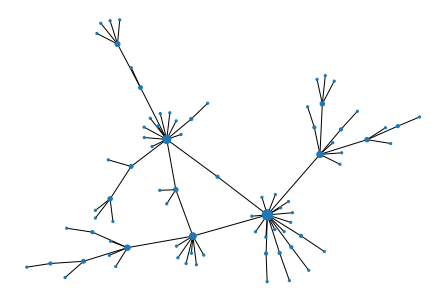

In [13]:
#Criando a rede
np.random.seed(42)
N = 500
a = 3
seq = np.random.zipf(a, N) #Zipf distribution
print(seq)
if(sum(seq)%2 != 0): # the sum of stubs have to be even
    pos = np.random.randint(0, len(seq))
    seq[pos] = seq[pos]+ 1
#print(sum(seq))
G=nx.configuration_model(seq)
#get the largest component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
d = dict(G.degree())
nx.draw(G, nodelist=d.keys(), node_size=[v * 5 for v in d.values()])
plt.show()



In [8]:
k2 = momento_distribuicao_grau(G,1)
print('Segundo momento da P(k):', k2)

Segundo momento da P(k): 3.1324786324786325
